# 2. Исследовательский анализ

#### библиотеки и код из предыдущего урока

In [3]:
pip install matplotlib

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data.csv', encoding = '1251')
pd.set_option('display.float_format','{:2f}'.format) # придает числовому значению отображаемому в научной записи читаемый вид с двумя заками после запятой
our_col = ['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Kol','DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc',  'DR_Apt', 'DR_NDrugs', 'DR_TPay', 
           'DR_CDrugs', 'DR_Suppl', 'DR_BCDisc', 'DR_TabEmpl','DR_VZak', 'DR_Pos']
df = df[our_col]
df.columns = ['date_purchase', 'time_purchase', 'num_chk', 'n_doc', 'kol','c_zak', 'c_roz', 's_disc', 'c_disc',  'apteka', 'drug', 't_pay', 
           'c_drugs', 'suppl', 'bc_disc', 'tabEmpl','v_zak', 'pos'] # Меняем местами столбцы и переименовываем
df['bc_disc'] = df['bc_disc'].astype('str').replace('\.0', '', regex=True) # для столбца bc_disc задаем тип str(строка) и убираем лишние нули
df['date_purchase'] = pd.to_datetime(df['date_purchase']).dt.strftime('%d.%m.%Y') # приводим дату к нужному нам формату
df['v_zak'] = df['v_zak'].astype('str').replace('1', 'обычный').replace('2', 'интернет')
df['c_disc'] = df.c_disc.fillna(0)    # заменяем пропуски на 0 

# 2.1 Cтруктура данных, описательные статистики и категориальные переменные

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_purchase  4462 non-null   object 
 1   time_purchase  4462 non-null   object 
 2   num_chk        4462 non-null   int64  
 3   n_doc          4462 non-null   int64  
 4   kol            4462 non-null   float64
 5   c_zak          4462 non-null   float64
 6   c_roz          4462 non-null   float64
 7   s_disc         4462 non-null   float64
 8   c_disc         4462 non-null   float64
 9   apteka         4462 non-null   int64  
 10  drug           4462 non-null   object 
 11  t_pay          4462 non-null   int64  
 12  c_drugs        4462 non-null   int64  
 13  suppl          4462 non-null   object 
 14  bc_disc        4462 non-null   object 
 15  tabEmpl        4462 non-null   int64  
 16  v_zak          4462 non-null   object 
 17  pos            4462 non-null   float64
dtypes: float

In [9]:
df.describe() # данный метд выводит описательную статистику

,num_chk,n_doc,kol,c_zak,c_roz,s_disc,c_disc,apteka,t_pay,c_drugs,tabEmpl,pos
count,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000
mean,4903.135365,10842995.328552,1.027755,241.639034,306.049148,10.561094,61.930524,10.838861,16.896011,259227.092111,91.737786,2.681085
std,1839.700082,6107181.404545,0.538485,454.557985,532.173394,31.368047,219.631064,6.107773,1.446943,299073.896261,108.081697,2.748813
min,1698.000000,2004595.000000,0.007220,0.010000,0.010000,0.000000,0.000000,2.000000,15.000000,3.000000,25.000000,1.000000
25%,4187.000000,6003620.000000,1.000000,36.645000,52.000000,0.000000,0.000000,6.000000,15.000000,29060.000000,37.000000,1.000000
50%,4877.500000,11007039.000000,1.000000,103.785000,137.000000,0.000000,0.000000,11.000000,18.000000,187304.000000,53.000000,2.000000
75%,5472.750000,18002536.000000,1.000000,299.060000,391.750000,7.000000,9.000000,18.000000,18.000000,377589.000000,123.000000,3.000000
max,8490.000000,18002543.000000,20.000000,11851.130000,12345.000000,650.000000,941.000000,18.000000,18.000000,1504498.000000,605.000000,24.000000


In [10]:
df['t_pay'].value_counts() # value_counts возвращает количество уникальных значений в столбце, отсортированное по убыванию.

t_pay
18    2820
15    1642
Name: count, dtype: int64

# 2.2 Исследовательский анализ: оценка распределений, связь между переменными

In [12]:
df['pos'] = df['pos'].astype('int')

In [13]:
df['pos'].value_counts() # оценка распределения позиций в чеке

pos
1     2019
2      971
3      528
4      301
5      178
6      117
7       76
8       56
9       42
10      37
11      30
12      25
13      21
14      17
15      14
16       9
17       7
18       4
19       3
20       2
21       2
23       1
24       1
22       1
Name: count, dtype: int64

<Axes: >

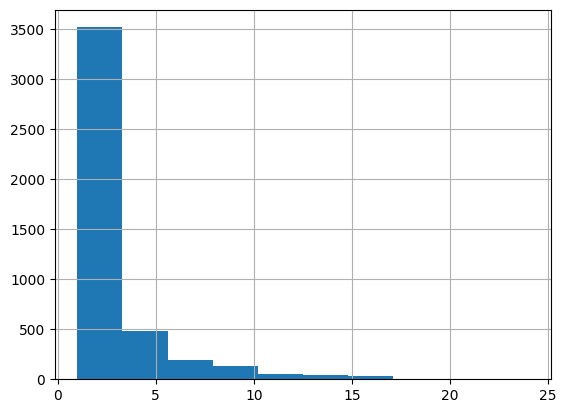

In [14]:
df.pos.hist()

In [15]:
df_corr = df.select_dtypes(exclude=['object'])

<Axes: >

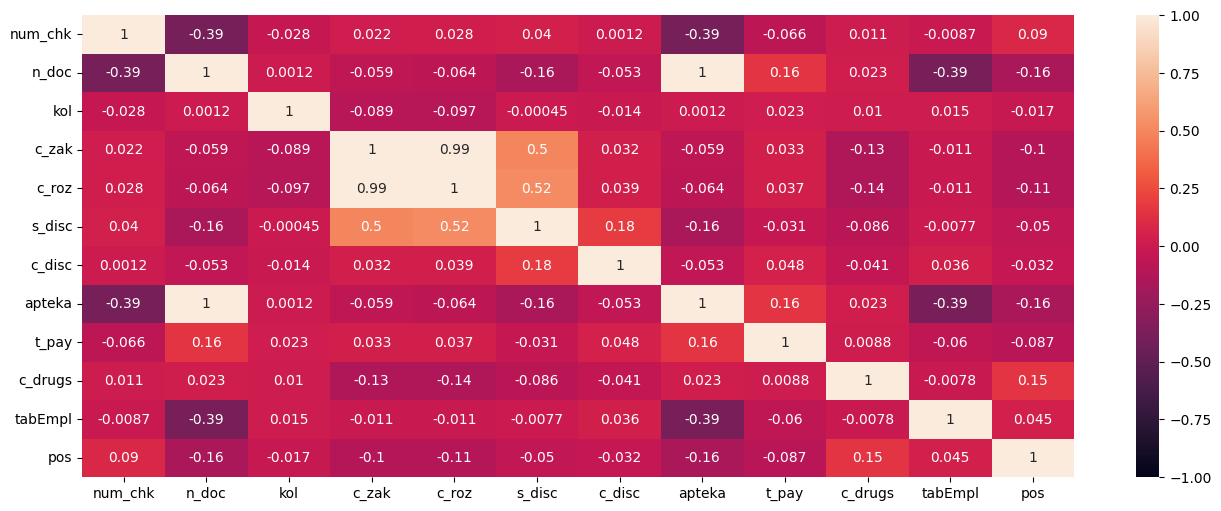

In [16]:
plt.figure(figsize=(16,6))
sns.heatmap(df_corr.corr(), vmax=1, vmin=-1, annot=True)

# 2.3 Исследовательский анализ: создание вычислимых столбцов, оценка распределений с box plot

In [18]:
df['hour_purchase'] = pd.to_datetime(df['time_purchase']).dt.hour

C:\Users\versh\AppData\Local\Temp\ipykernel_2328\1270137711.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_purchase'] = pd.to_datetime(df['time_purchase']).dt.hour


In [19]:
gr_h = df.groupby(['hour_purchase'])['kol'].agg(sum)
gr_h

hour_purchase
8     20.100000
9    236.500000
10   361.649048
11   326.545238
12   311.587143
13   422.795714
14   358.296190
15   432.972857
16   375.875000
17   375.450000
18   457.501190
19   419.291071
20   388.567619
21    97.711429
22     1.000000
Name: kol, dtype: float64

<Axes: ylabel='kol'>

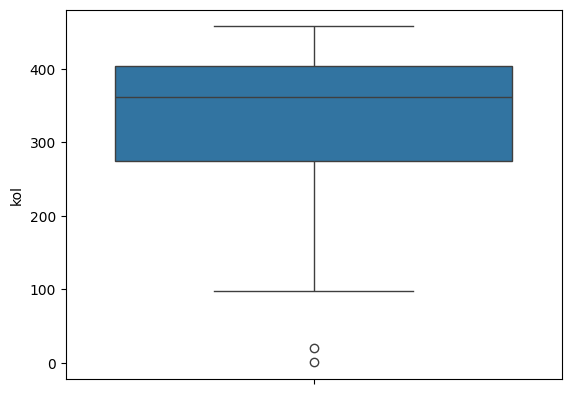

In [20]:
sns.boxplot(gr_h)

# 2.4 Исследовательский анализ: группировка данных

In [69]:
df.groupby(['date_purchase', 'num_chk'])[['kol', 'c_roz', 'c_zak']]\
  .agg({'kol': 'sum', 'c_roz':['sum', 'max'], 'c_zak':['sum', 'max']})\
  .reset_index() # группировка по нескольким столбцам

date_purchase num_chk       kol       c_roz                 c_zak  \
                                 sum         sum        max        sum   
0       11.08.2022    1698  1.000000  463.000000 463.000000 342.300000   
1       11.08.2022    1699  1.000000  720.000000 720.000000 545.270000   
2       11.08.2022    1700  1.000000   60.000000  60.000000  36.680000   
3       11.08.2022    1701  4.000000  955.000000 443.000000 756.120000   
4       11.08.2022    1702  1.000000   94.000000  94.000000  76.550000   
...            ...     ...       ...         ...        ...        ...   
1936    12.08.2022    8486  1.000000  460.000000 460.000000 302.070000   
1937    12.08.2022    8487  1.000000  476.000000 476.000000 396.660000   
1938    12.08.2022    8488  1.000000  220.000000 220.000000 187.840000   
1939    12.08.2022    8489 18.000000 1089.000000 180.000000 778.610000   
1940    12.08.2022    8490  3.000000  869.000000 775.000000 626.130000   

                 
            max  
0    342.300000  
1    545.270000  
2     36.680000  
3    364.080000  
4     76.550000  
...         ...  
1936 302.070000  
1937 396.660000  
1938 187.840000  
1939 114.460000  
1940 565.690000  

[1941 rows x 7 columns]

In [77]:
agr = df.groupby(['date_purchase', 'tabEmpl'])[['c_zak', 'c_roz']].agg(sum)

In [79]:
agr['revenue'] = agr['c_roz'] - agr['c_zak']
agr

c_zak         c_roz      revenue
date_purchase tabEmpl                                        
11.08.2022    25      72004.240000  93030.000000 21025.760000
              30      90350.410000 111916.970000 21566.560000
              36      62425.320000  77368.030000 14942.710000
              47      68458.330000  86626.010000 18167.680000
              50      72304.410000  90830.010000 18525.600000
              53      37727.080000  48746.000000 11018.920000
              54      52880.810000  67517.080000 14636.270000
              123     88926.210000 116678.030000 27751.820000
              205     49904.420000  59471.000000  9566.580000
              605     28699.650000  36954.010000  8254.360000
12.08.2022    37      92688.930000 118091.370000 25402.440000
              48      72773.600000  93032.020000 20258.420000
              54      65852.520000  83229.050000 17376.530000
              110     89126.470000 113275.050000 24148.580000
              123     99298.800000 124231.660000 24932.860000
              205     34772.170000  44595.010000  9822.840000

In [81]:
df.groupby(['date_purchase', 'tabEmpl'])[['c_roz', 'c_zak']].apply(lambda x: sum (x['c_roz'] - x['c_zak']))

date_purchase  tabEmpl
11.08.2022     25        21025.760000
               30        21566.560000
               36        14942.710000
               47        18167.680000
               50        18525.600000
               53        11018.920000
               54        14636.270000
               123       27751.820000
               205        9566.580000
               605        8254.360000
12.08.2022     37        25402.440000
               48        20258.420000
               54        17376.530000
               110       24148.580000
               123       24932.860000
               205        9822.840000
dtype: float64

# 2.5 Исследовательский анализ: оценка связи переменных с разбивкой

In [88]:
df.groupby(['date_purchase', 'drug'])[['kol','c_roz']].agg({'c_roz':'mean', 'kol':'sum'})

c_roz  \
date_purchase drug                                                             
11.08.2022    911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА     111.000000   
              911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.        104.000000   
              L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/          170.000000   
              L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/             93.000000   
              ZD ТЕЙМУРОВА СПРЕЙ Д/НОГ П/ПОТА И ЗАПАХА 150МЛ....   96.000000   
...                                                                      ...   
12.08.2022    ЭУФИЛЛИН 150МГ. №30 ТАБ. /ФАРМСТАНДАРТ/              31.000000   
              ЮНИЭНЗИМ С МПС №20 ТАБ. П/О                         141.000000   
              Я ЗАБОЧУСЬ О ЗДОРОВЬЕ ТРАВЯН.КОФЕ КОФЕЙНЫЙ НАПИ...  145.000000   
              ЯНТАРНАЯ К-ТА ФОРП 100МГ. №10 ТАБ.                   14.000000   
              ЯРИНА №21 ТАБ. П/П/О                               1292.000000   

                                                                      kol  
date_purchase drug                                                         
11.08.2022    911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА    1.000000  
              911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.       1.000000  
              L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/         1.000000  
              L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/           1.000000  
              ZD ТЕЙМУРОВА СПРЕЙ Д/НОГ П/ПОТА И ЗАПАХА 150МЛ.... 1.000000  
...                                                                   ...  
12.08.2022    ЭУФИЛЛИН 150МГ. №30 ТАБ. /ФАРМСТАНДАРТ/            2.000000  
              ЮНИЭНЗИМ С МПС №20 ТАБ. П/О                        1.000000  
              Я ЗАБОЧУСЬ О ЗДОРОВЬЕ ТРАВЯН.КОФЕ КОФЕЙНЫЙ НАПИ... 1.000000  
              ЯНТАРНАЯ К-ТА ФОРП 100МГ. №10 ТАБ.                 2.000000  
              ЯРИНА №21 ТАБ. П/П/О                               1.000000  

[2304 rows x 2 columns]

In [90]:
df['round_c_roz'] = df.c_roz.apply(lambda x: round(x, -2))

In [94]:
group_roz_price = df.groupby(['date_purchase', 'round_c_roz'])[['kol']].agg(sum).reset_index()
group_roz_price

,date_purchase,round_c_roz,kol
0,11.08.2022,0.000000,770.000000
1,11.08.2022,100.000000,742.000000
2,11.08.2022,200.000000,328.425000
3,11.08.2022,300.000000,196.200000
4,11.08.2022,400.000000,133.000000
...,...,...,...
68,12.08.2022,4400.000000,1.000000
69,12.08.2022,5000.000000,1.000000
70,12.08.2022,5800.000000,1.000000
71,12.08.2022,10200.000000,1.000000


<Axes: xlabel='kol', ylabel='round_c_roz'>

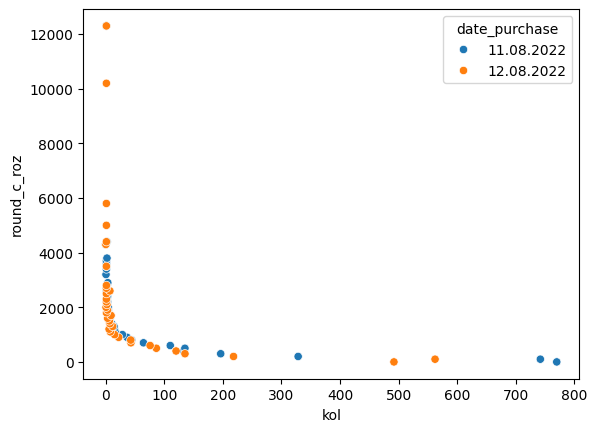

In [100]:
sns.scatterplot(x = group_roz_price.kol, y =  group_roz_price.round_c_roz, hue = group_roz_price.date_purchase)

# 2.6 Исследовательский анализ: группировка по нескольким столбцам

In [109]:
pivot_df = df.groupby(['date_purchase', 'apteka', 't_pay', 'tabEmpl'])[['kol']].agg(sum).reset_index()

In [117]:
pivot_df.pivot_table(values = 'kol', index=['date_purchase', 'tabEmpl', 'apteka'], columns='t_pay').reset_index() # делаем сводную таблицу

t_pay,date_purchase,tabEmpl,apteka,15,18
0,11.08.2022,25,6,95.000000,142.534286
1,11.08.2022,30,11,179.000000,310.480000
2,11.08.2022,36,17,54.733333,186.945000
3,11.08.2022,47,18,89.040000,236.237143
4,11.08.2022,50,13,180.400000,151.783333
5,11.08.2022,53,15,51.980000,142.100000
6,11.08.2022,54,18,65.100000,198.765714
7,11.08.2022,123,2,151.052226,164.134440
8,11.08.2022,205,2,65.107143,66.000000
9,11.08.2022,605,7,67.040000,101.850000


In [119]:
df.pivot_table(values = 'c_roz', index=['date_purchase', 'tabEmpl', 'apteka'], columns='t_pay', aggfunc = sum)\
  .reset_index() # делаем то же самое, но только пропускаем шаг с группировкой

t_pay,date_purchase,tabEmpl,apteka,15,18
0,11.08.2022,25,6,27402.000000,65628.000000
1,11.08.2022,30,11,38692.320000,73224.650000
2,11.08.2022,36,17,20890.000000,56478.030000
3,11.08.2022,47,18,25685.010000,60941.000000
4,11.08.2022,50,13,44746.000000,46084.010000
5,11.08.2022,53,15,20155.000000,28591.000000
6,11.08.2022,54,18,12118.000000,55399.080000
7,11.08.2022,123,2,55981.010000,60697.020000
8,11.08.2022,205,2,27403.000000,32068.000000
9,11.08.2022,605,7,17618.000000,19336.010000


In [121]:
df_return = df.pivot_table(values = 'c_roz', index=['date_purchase', 'tabEmpl', 'apteka'], columns='t_pay', aggfunc = sum)\
  .reset_index()

In [162]:
df_return = pd.melt(df_return, id_vars = ['date_purchase', 'tabEmpl', 'apteka'], value_vars = [15, 18]) # обратное преобразование
df_return

,date_purchase,tabEmpl,apteka,t_pay,value
0,11.08.2022,25,6,15,27402.000000
1,11.08.2022,30,11,15,38692.320000
2,11.08.2022,36,17,15,20890.000000
3,11.08.2022,47,18,15,25685.010000
4,11.08.2022,50,13,15,44746.000000
5,11.08.2022,53,15,15,20155.000000
6,11.08.2022,54,18,15,12118.000000
7,11.08.2022,123,2,15,55981.010000
8,11.08.2022,205,2,15,27403.000000
9,11.08.2022,605,7,15,17618.000000


# 2.7 Исследовательский анализ: индексация, фильтрация, перекодировка

In [136]:
df.iloc[:2,:6]

,date_purchase,time_purchase,num_chk,n_doc,kol,c_zak
0,11.08.2022,10:15:35,2173,2004598,1.000000,41.080000
1,11.08.2022,10:27:46,2174,2004598,1.000000,18.610000


In [138]:
df.loc[:2,['time_purchase','c_zak']]

,time_purchase,c_zak
0,10:15:35,41.080000
1,10:27:46,18.610000
2,10:27:46,132.690000


In [146]:
df[(df['kol']>5) | (df['c_zak']>2000)] # фильтрация по условию

,date_purchase,time_purchase,num_chk,n_doc,kol,c_zak,c_roz,s_disc,c_disc,apteka,drug,t_pay,c_drugs,suppl,bc_disc,tabEmpl,v_zak,pos,hour_purchase,round_c_roz
27,11.08.2022,11:50:16,2184,2004598,1.000000,2545.840000,2824.000000,141.000000,9.000000,2,АКАТИНОЛ МЕМАНТИН 20МГ. №28 ТАБ. П/П/О /МЕРЦ Ф...,15,153467,ВИТТА КОМПАНИ ООО,200010014079,205,обычный,1,11,2800.000000
29,11.08.2022,11:50:16,2184,2004598,1.000000,3076.030000,3432.000000,171.000000,9.000000,2,ПРАДАКСА 110МГ. №60 КАПС. /БЕРИНГЕР/,15,154600,Протек,200010014079,205,обычный,5,11,3400.000000
45,11.08.2022,13:10:54,2192,2004598,1.000000,11851.130000,12345.000000,0.000000,0.000000,2,ЦЕФАЛИ АППАРАТ Д/ТЕРАПИИ МИГРЕНИ С ПРИНАДЛ.,18,455413,Протек,nan,205,интернет,1,13,12300.000000
62,11.08.2022,14:47:12,2201,2004598,1.000000,2669.940000,2945.000000,147.000000,9.000000,2,ДЖАРДИНС 10МГ. №30 ТАБ. П/П/О /БЕРИНГЕР/,15,296849,Катрен г.Химки,200010024690,205,обычный,1,14,2900.000000
93,11.08.2022,16:34:31,2214,2004598,1.000000,2282.330000,2525.000000,0.000000,0.000000,2,"ЭЛИКВИС 2,5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ...",18,192460,Катрен г.Химки,nan,205,обычный,7,16,2500.000000
202,11.08.2022,14:03:40,4206,7002453,7.000000,4.980000,9.000000,0.000000,0.000000,7,АСКОРБИНОВАЯ К-ТА 25МГ. №10 ТАБ. КРУТКА САХ. /...,18,564894,Катрен г.Химки,nan,605,обычный,1,14,0.000000
240,11.08.2022,17:21:28,4221,7002453,1.000000,2888.350000,3669.000000,256.000000,9.000000,7,ПИАСКЛЕДИН 300МГ. №60 КАПС.,15,509626,Здравсервис,200010023424,605,обычный,1,17,3700.000000
373,11.08.2022,11:07:19,2443,13002664,0.333333,2527.580000,3160.000000,0.000000,0.000000,13,"МИДИАНА 3МГ.+0,03МГ. №63(21Х3) ТАБ. П/П/О /ГЕД...",18,184303,ВИТТА КОМПАНИ ООО,nan,50,обычный,2,11,3200.000000
468,11.08.2022,15:19:03,2488,13002664,1.000000,2284.630000,2532.000000,126.000000,9.000000,13,"ЭЛИКВИС 2,5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ...",18,192460,Протек,200010016190,50,обычный,8,15,2500.000000
519,11.08.2022,17:01:38,2507,13002664,1.000000,3390.200000,3550.000000,0.000000,0.000000,13,АЛФЛУТОП 2МЛ. №10 Р-Р Д/ИН. АМП.,15,511070,ЕАПТЕКА ООО,nan,50,интернет,1,17,3600.000000


In [160]:
df[df.loc[:, 't_pay'].isin([15])] # отбираем троки где тип оплаты 15

,date_purchase,time_purchase,num_chk,n_doc,kol,c_zak,c_roz,s_disc,c_disc,apteka,drug,t_pay,c_drugs,suppl,bc_disc,tabEmpl,v_zak,pos,hour_purchase,round_c_roz
1,11.08.2022,10:27:46,2174,2004598,1.000000,18.610000,31.000000,3.000000,9.000000,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,15,261519,Катрен г.Химки,200010010204,205,обычный,1,10,0.000000
2,11.08.2022,10:27:46,2174,2004598,1.000000,132.690000,209.000000,20.000000,9.000000,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,15,460864,Катрен г.Химки,200010010204,205,обычный,2,10,200.000000
3,11.08.2022,10:27:46,2174,2004598,1.000000,133.650000,210.000000,21.000000,9.000000,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,15,172823,Катрен г.Химки,200010010204,205,обычный,3,10,200.000000
18,11.08.2022,11:23:22,2180,2004598,1.000000,43.310000,66.000000,4.000000,9.000000,2,ЦИТРАМОН П №20 ТАБ. /ФАРМСТАНДАРТ/,15,393314,Катрен г.Химки,200010020147,205,обычный,1,11,100.000000
19,11.08.2022,11:23:22,2180,2004598,1.000000,42.080000,64.000000,4.000000,9.000000,2,ЦИТРАМОН П №20 ТАБ. /ФАРМСТАНДАРТ/,15,393314,"ООО ""Акцентмед""",200010020147,205,обычный,2,11,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,12.08.2022,21:31:20,5684,18002542,2.000000,37.480000,59.000000,0.000000,0.000000,18,ИХТИОЛОВАЯ 20% 25Г. МАЗЬ Д/НАРУЖ.ПРИМ. ТУБА /У...,15,565799,Протек,nan,48,обычный,1,21,100.000000
4453,12.08.2022,21:36:07,5687,18002542,1.000000,102.450000,120.000000,6.000000,9.000000,18,"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТ...",15,72392,Пульс,200010027575,48,обычный,1,21,100.000000
4454,12.08.2022,21:38:35,5688,18002542,1.000000,221.600000,295.000000,20.000000,9.000000,18,МАКСИКОЛД РИНО АПЕЛЬСИН 15Г. №10 ПОР. Д/Р-РА Д...,15,126129,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,200010027575,48,обычный,1,21,300.000000
4455,12.08.2022,21:38:35,5688,18002542,1.000000,160.730000,221.000000,22.000000,9.000000,18,ЭДАС-306 ПАССАМБРА НЕВРОЗЫ 100МЛ. СИРОП ФЛ.,15,5852,Катрен г.Химки,200010027575,48,обычный,2,21,200.000000


In [182]:
df_map = {'обычный' : 'офлайн покупка', 'интернет': 'онлайн покупка'}
df['v_zak'].map(df_map).value_counts()

v_zak
офлайн покупка    4304
онлайн покупка     158
Name: count, dtype: int64